# Hebb

import numpy sebagai pengeksekusi operasi matematika untuk n dimensional array dan matplotlib untuk menampilkan data

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

membuat grid 5*5

In [109]:
size = 5
cross = np.full((size,size),-1,np.int32)
plus = np.full([5,5],-1,np.int32)


membuat pola cross dan plus 

In [110]:
def cross_pattern(size, arr:np.ndarray) -> None:
    if not size:
        return
    for i in range(size):
        arr[i,i] = 1
        arr[i,size-1-i] = 1

def plus_pattern(size:int, arr:np.ndarray) -> None:
    if not size:
        return
    line = size//2
    arr[line,:] = 1
    arr[:,line] = 1

cross_pattern(size,cross)
plus_pattern(size,plus)


tamplilan pattern

Text(0.5, 1.0, 'Plus')

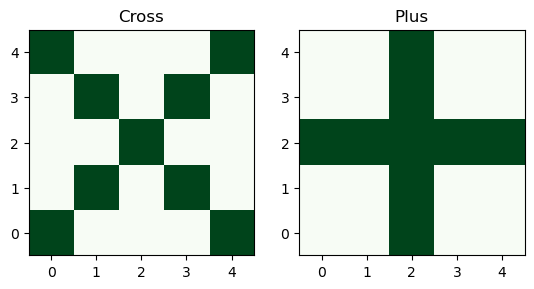

In [111]:
fig, axes = plt.subplots(1, 2)

axes[0].imshow(cross, cmap='Greens',origin='lower', vmin=-1, vmax=1)
axes[0].set_title("Cross")

axes[1].imshow(plus, cmap='Greens',origin='lower', vmin=-1, vmax=1)
axes[1].set_title("Plus")

### Learning rules

---

- inisialisasi weight = 0
- W(new) = W(old) + (input * target)
- B(new) = B(old) + target

In [112]:
weight = np.zeros([size * size],dtype= np.int32)
bias = 0

In [113]:
def learn(inputs: np.ndarray, target: np.ndarray) -> None :
    print('learn')
    for i in range(len(inputs)):
        global weight
        global bias
        weight = weight + inputs[i].flatten() * target[i]
        bias = bias + target[i]
        print(f'weight : {weight}')
        print(f'bias : {bias}')
        print('\n---------\n')

mendefinisikan fungsi aktivasi neuron tipe biner

In [114]:
def activation(res:int) -> bool:
    return res >= 0

mendefinisikan fungsi net

In [115]:
def net(pattern: np.ndarray) -> int:
    input = pattern.flatten()
    return sum((input*weight)) + bias


---

learning

In [116]:
learn(np.array([plus,cross]),np.array([-1,1]))

learn
weight : [ 1  1 -1  1  1  1  1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1  1  1  1  1 -1  1
  1]
bias : -1

---------

weight : [ 2  0 -2  0  2  0  2 -2  2  0 -2 -2  0 -2 -2  0  2 -2  2  0  2  0 -2  0
  2]
bias : 0

---------



---

## Test Section

In [117]:
data = np.full((5,5),-1)
# Fungsi pembuat tombol
def make_button(i, j):
    button = widgets.Button(
        description=str(data[i, j]),
        layout=widgets.Layout(width='40px', height='40px')
    )

    # Event saat tombol diklik
    def on_click(b):
        clear_output(wait=True)
        # Toggle nilai -1 <-> 1
        data[i, j] *= -1
        b.description = str(data[i, j])
        b.style.button_color = 'lightgreen' if data[i, j] == 1 else 'lightgray'
       

    button.on_click(on_click)
    button.style.button_color = 'lightgray'
    return button

# Buat grid tombol
grid = [[make_button(i, j) for j in range(5)] for i in range(5)]

# Tampilkan grid sebagai VBox of HBox
ui = widgets.VBox([widgets.HBox(row) for row in grid])
display(ui)

In [118]:
print(net(data))
print(activation(net(data)))

0
True


# Dfs dan Bfs dari graf berarah

```mermaid
graph structure
    1 --> [3,6,5]
    2 --> []
    3 --> [1,6]
    4 --> []
    5 --> [2]
    6 --> [4]
```


In [119]:
from __future__ import annotations
from collections import deque

class Node:
    def __init__(self, nodes,val) -> None:
        self.adjacent = []
        self.val = val
        self.addNewnode(nodes)

    #menambahkan adjacent node diluar constructor
    def addNewnode(self, nodes) -> None:
        if nodes is None:
            return
        for node in nodes:
            self.adjacent.append(node)
    
    #mencari adjacent node dengan value yang sama dengan val
    def searchnode(self, val:int) -> Node|None:
        for node in self.adjacent:
            if node.val == val:
                return node
        return None
    
    #mencari node dengan metode depth first search
    @staticmethod
    def DFS(start: Node, targetval:int) -> Node | None:
        visited = set()
        
        def helper(node, targetval):
            print(node.val) #print value ketika mengunjungi node
            if node.val == targetval:
                return node
            
            visited.add(node)
            res = None
            for node in node.adjacent:
                if node in visited:
                    continue
                res = helper(node,targetval)

                if res != None:

                    return res
                
            return res
        
        return helper(start,targetval)
    
    #mencari node dengan metode Breadth First Search
    @staticmethod
    def BFS(node:Node, targetval:int) -> Node|None:
        if not node:
            return node
        
        visited = set()
        container = deque()
        
        container.append(node)

        while(len(container) != 0):
            x = container.popleft()

            if x is None or x in visited:
                continue

            print(x.val) # print value ketika mengunjungi node
            if x.val == targetval:
                return x
            
            visited.add(x)
            
            for node in x.adjacent:
                if node in visited:
                    continue
                container.append(node)

        return None



inisialisasi awal

In [120]:
node1 = Node([Node(None,3), Node(None,6), Node(None,5)],1)   #adjacency list = [3,6,5]
node2 = Node(None,2)  #adjacency list = []

node3 = node1.searchnode(3) or Node(None, 3)
node3.addNewnode([node1,node1.searchnode(6)]) #adjacency list = [1,6]

node4 = Node(None,4) #adjacency list = []

node5 = node1.searchnode(5) or Node(None,5)
node5.addNewnode([node2]) #adjacency list = [2]

node6 = node1.searchnode(6) or Node(None,6)
node6.addNewnode([node4]) #adjacency list[4]



---

Test

In [121]:
Node.DFS(node1,4)
print('\n-------\n')
Node.BFS(node1,4)

1
3
6
4

-------

1
3
6
5
4
